## Open Model

In [1]:
import tensorflow as tf
import scipy.misc
import model
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load tensorflow section
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model-66")

INFO:tensorflow:Restoring parameters from save/model-66


### Grab one image

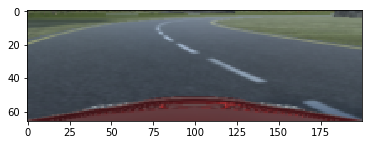

In [3]:
i = 0
full_image = scipy.misc.imread("images_Richard/" + "3" + ".png", mode="RGB")
image = scipy.misc.imresize(full_image[-130:], [66, 200]) / 255.0

plt.imshow(image)
plt.show()

### Evalulate network to get one steering angle

In [4]:
degrees = model.y.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})[0][0]
print(degrees)

-0.11381


### Grab some activations

In [5]:
conv5act = model.conv5.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})
conv4act = model.conv4.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})
conv3act = model.conv3.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})
conv2act = model.conv2.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})
conv1act = model.conv1.eval(feed_dict={model.x: [image], model.dropout_prob: 1.0})

# check shapes
print(conv5act.shape)
print(conv4act.shape)
print(conv3act.shape)
print(conv2act.shape)
print(conv1act.shape)

(1, 1, 18, 64)
(1, 3, 20, 64)
(1, 5, 22, 48)
(1, 14, 47, 36)
(1, 31, 98, 24)


### Average each layers activations

(1, 18)
(3, 20)
(5, 22)
(14, 47)
(31, 98)


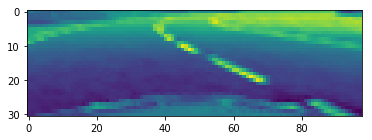

In [6]:
averageC5 = np.mean(conv5act,axis=3).squeeze(axis=0)
averageC4 = np.mean(conv4act,axis=3).squeeze(axis=0)
averageC3 = np.mean(conv3act,axis=3).squeeze(axis=0)
averageC2 = np.mean(conv2act,axis=3).squeeze(axis=0)
averageC1 = np.mean(conv1act,axis=3).squeeze(axis=0)

# check shapes
print(averageC5.shape)
print(averageC4.shape)
print(averageC3.shape)
print(averageC2.shape)
print(averageC1.shape)

plt.imshow(averageC1)
plt.show()


### Upscale and mult on all layers

In [7]:
averageC5up = scipy.misc.imresize(averageC5,[averageC4.shape[0], averageC4.shape[1]])

multC45 = np.multiply(averageC5up,averageC4)
#print(averageC5up.shape)
#print(averageC4.squeeze(axis=0).shape)
print(multC45.shape)
multC45up = scipy.misc.imresize(multC45,[averageC3.shape[0], averageC3.shape[1]])
print(multC45up.shape)
multC34 = np.multiply(multC45up,averageC3)
print(multC34.shape)
multC34up = scipy.misc.imresize(multC34,[averageC2.shape[0], averageC2.shape[1]])
print(multC34up.shape)
multC23 = np.multiply(multC34up,averageC2)
print(multC23.shape)
multC23up = scipy.misc.imresize(multC23,[averageC1.shape[0], averageC1.shape[1]])
print(multC23up.shape)
multC12 = np.multiply(multC23up,averageC1)
print(multC12.shape)
multC12up = scipy.misc.imresize(multC12,[image.shape[0], image.shape[1]])
print(multC12up.shape)

(3, 20)
(5, 22)
(5, 22)
(14, 47)
(14, 47)
(31, 98)
(31, 98)
(66, 200)


### Normalise between 0 and 1

In [8]:
salient_mask = (multC12up - np.min(multC12up))/(np.max(multC12up) - np.min(multC12up))

### Show mask over the image

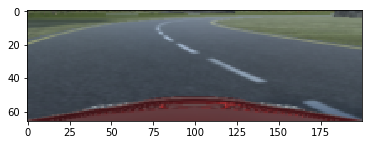

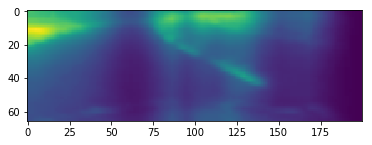

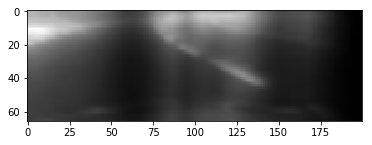

[[ 0.71428571  0.71428571  0.71428571 ...,  0.00396825  0.          0.        ]
 [ 0.71031746  0.71031746  0.71031746 ...,  0.00396825  0.          0.        ]
 [ 0.70238095  0.70238095  0.70238095 ...,  0.00396825  0.          0.        ]
 ..., 
 [ 0.24206349  0.24206349  0.24206349 ...,  0.          0.          0.        ]
 [ 0.24206349  0.24206349  0.24206349 ...,  0.          0.          0.        ]
 [ 0.24206349  0.24206349  0.24206349 ...,  0.          0.          0.        ]]


In [9]:
plt.imshow(image)
plt.show()

plt.imshow(salient_mask)
plt.show()

salient_mask_stacked = np.dstack((salient_mask,salient_mask))
salient_mask_stacked = np.dstack((salient_mask_stacked,salient_mask))


plt.imshow(salient_mask_stacked)
plt.show()


#plt.imshow(np.multiply(image,salient_mask_stacked))
#plt.show()
#newim = Image.blend(image,salient_mask_stacked,0.5)

print(salient_mask)